# Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("UberDataset.csv")

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
#shape of dataset
df.shape

(1156, 7)

In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
# basic description of the data
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
df.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [8]:
# Convert the "Start_date" and "End_date" columns to date time with "coerce"
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")


# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':",df['START_DATE'].dtype)
print("Data type of 'END_DATE':",df['END_DATE'].dtype)

Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


# Data Cleaning

In [9]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [10]:
drop_columns = df.columns.drop('PURPOSE')
df.dropna(subset=drop_columns, inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [11]:
df['START'] = df['START'].replace("Kar?chi", "Karachi")
df['STOP'] = df['STOP'].replace("Kar?chi", "Karachi")

# Exploratory Data Analysis

In [13]:
df.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

<Axes: xlabel='CATEGORY', ylabel='count'>

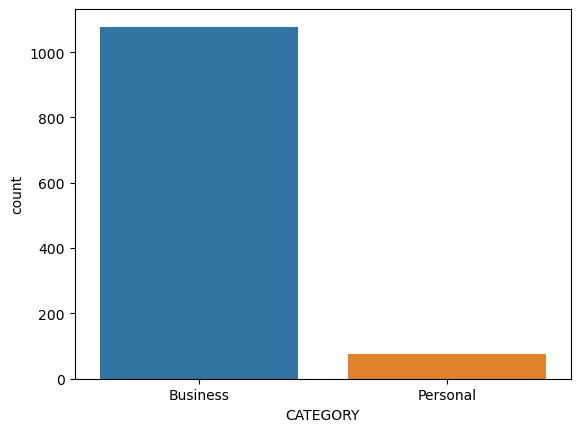

In [15]:
sns.countplot(x=df["CATEGORY"],data=df)

In [16]:
df.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

<Axes: xlabel='PURPOSE', ylabel='count'>

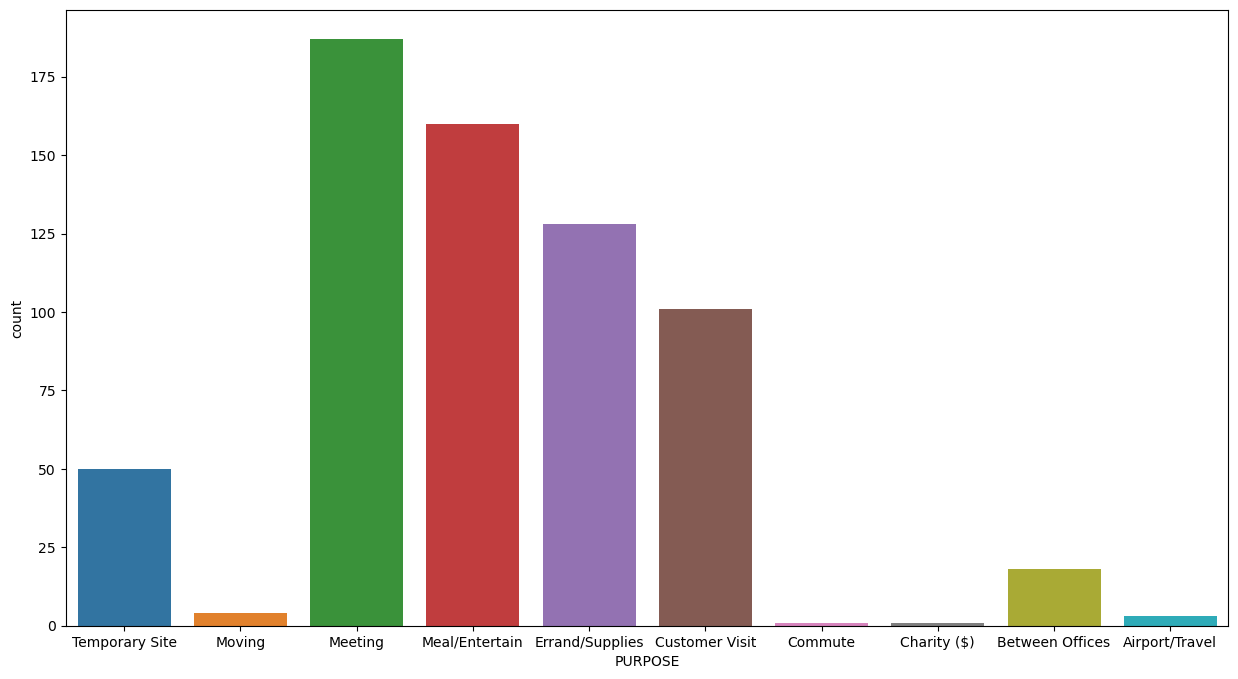

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x=df["PURPOSE"].sort_values(ascending=False),data=df)

# Comparison with the average distance travelled by passenger

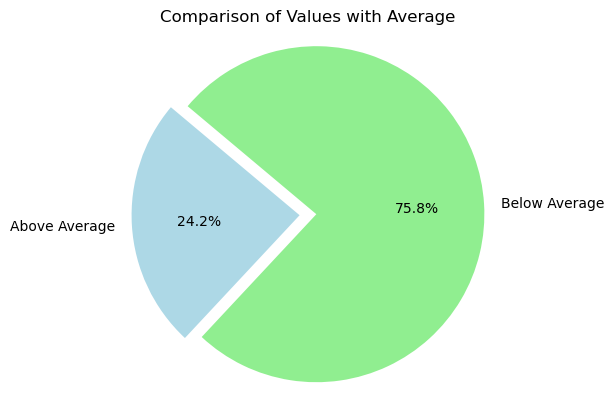

In [25]:
average_value = df['MILES'].mean()

# Compare values with the average and categorize them
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]

# Data for the pie chart
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightgreen']
exp=[0.1,0]

# Create a pie chart
plt.pie(sizes, labels=labels,explode=exp,colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Comparison of Values with Average')
plt.show()

Average miles travelled for different purposes

In [27]:
average_distance_travelled = df.groupby('PURPOSE')['MILES'].mean()
average_distance_travelled

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

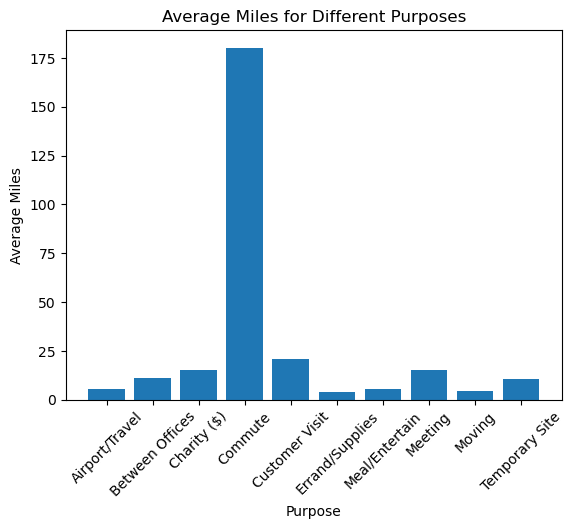

In [30]:
plt.bar(average_distance_travelled.index, average_distance_travelled.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different Purposes')
plt.xticks(rotation=45)
plt.show()

Type of Passengers Category Wise



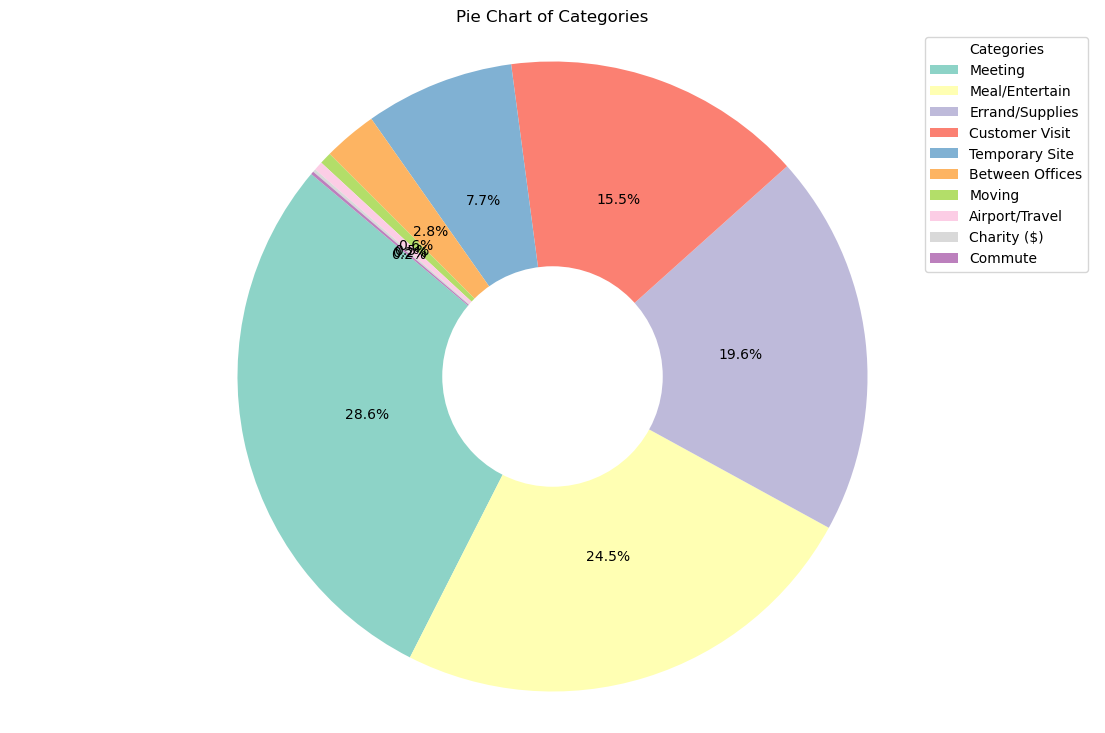

In [33]:
# Count the occurrences of each category
category_counts = df['PURPOSE'].value_counts()

# Data for the pie chart
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors  # Choose a colormap

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Adding white circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [39]:
# least 5 start stations
least_5_start_stations = df['START'].value_counts().nsmallest(5)
least_5_start_stations

Fuquay-Varina           1
Wake Co.                1
NOMA                    1
Santa Clara             1
North Berkeley Hills    1
Name: START, dtype: int64

In [44]:
# least 5 stop stations
least_5_stop_stations = df['STOP'].value_counts().nsmallest(5)
least_5_stop_stations

Arlington Park at Amberly    1
Stonewater                   1
Elk Park                     1
Summerwinds                  1
Parkwood                     1
Name: STOP, dtype: int64

In [45]:
# calculating ride durations by subtracting start time by end time
df['ride_duration'] = df['END_DATE'] - df['START_DATE']

# Calculating min, max, and average ride durations
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
average_duration = df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.597402597


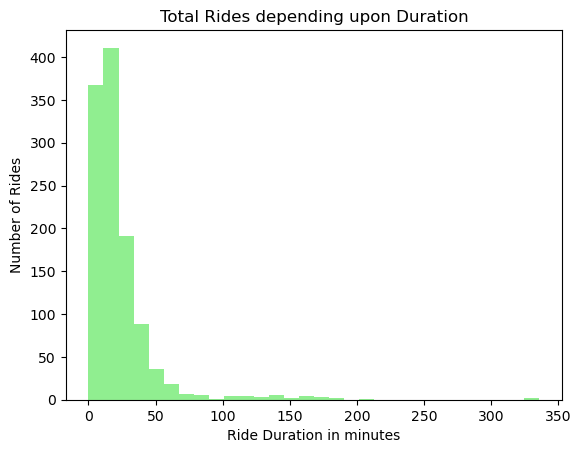

In [50]:
#plotting the values in histogram
plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= 'lightgreen') 
plt.xlabel('Ride Duration in minutes')
plt.ylabel('Number of Rides')
plt.title('Total Rides depending upon Duration')
plt.show()